# Practical example

## Importing the relevant libraries

In [173]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

## Loading the raw data

In [174]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Used-Car-Prizes.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [175]:

#raw_data.describe()
#raw_data.describe(include=[object]) 
raw_data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


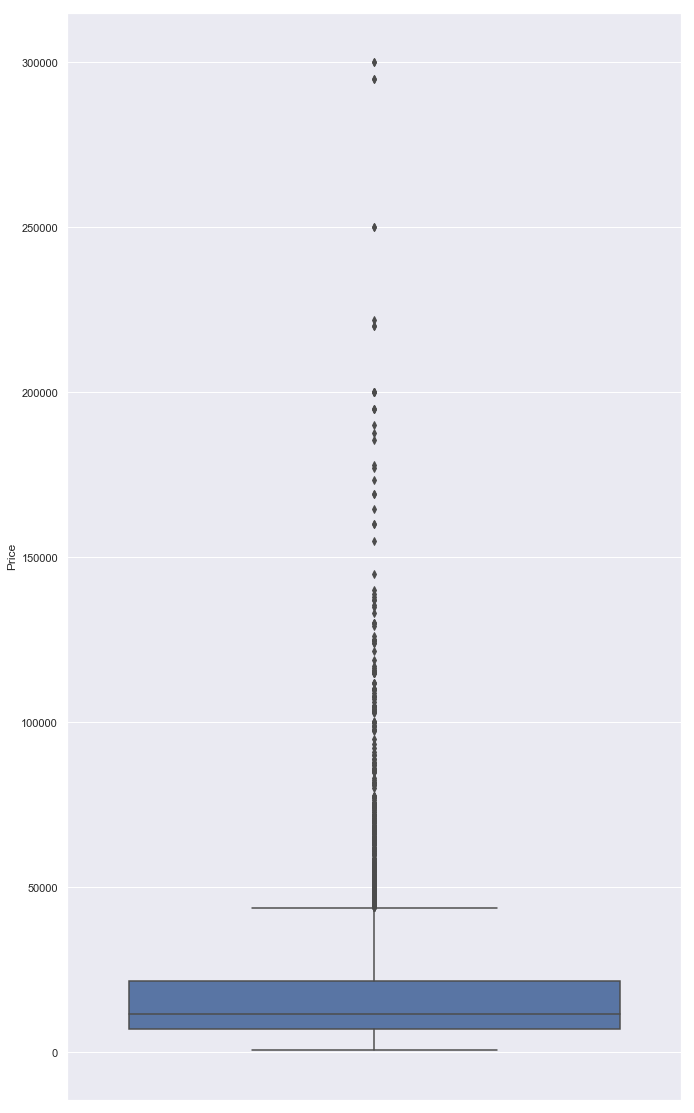

In [176]:
sns.set(rc={'figure.figsize':(11,20)})
sns.boxplot(y=raw_data["Price"])
sns.set(rc={'figure.figsize':(6,8)})

### Determining the variables of interest

In [177]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
# data = raw_data.drop(['Model'],axis=1)
data = raw_data
# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Dealing with missing values

In [178]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

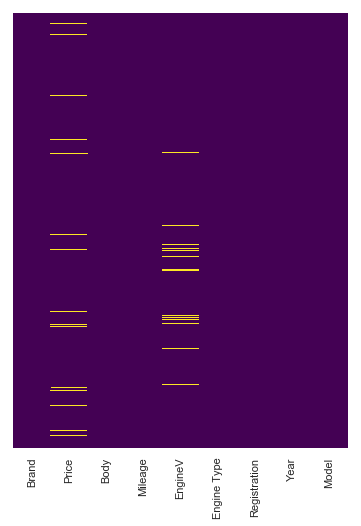

In [179]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [180]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [181]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Exploring the PDFs

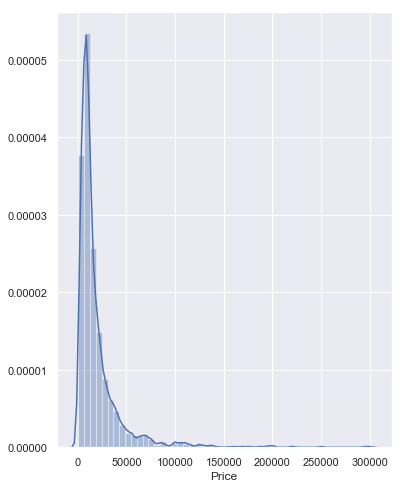

In [182]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [183]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29,NaN
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75,NaN
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


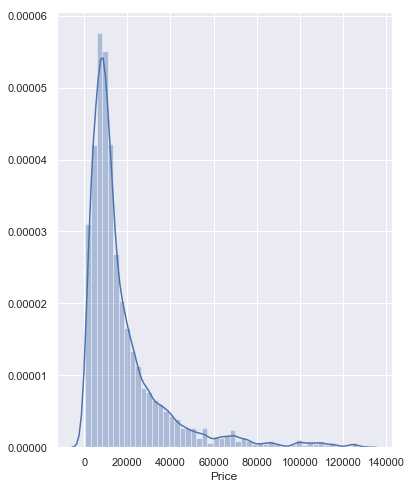

In [184]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

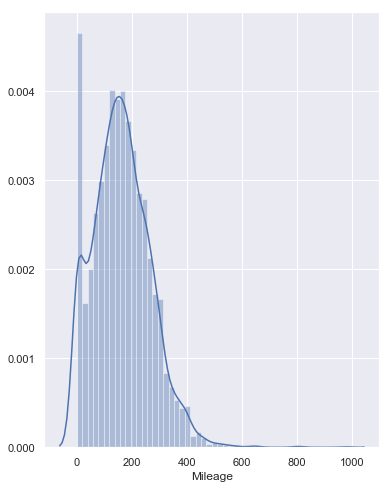

In [185]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [186]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

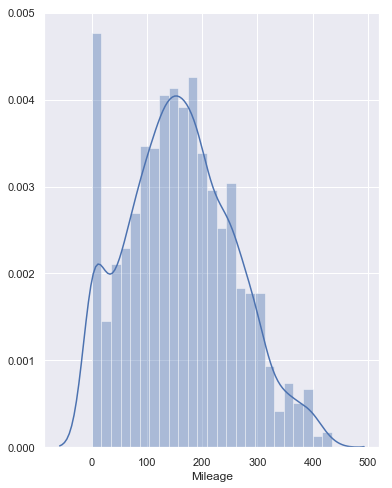

In [187]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

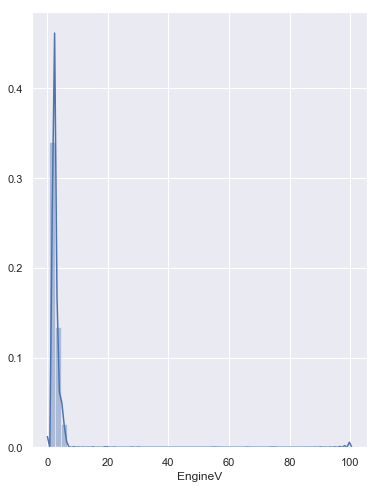

In [188]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [189]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

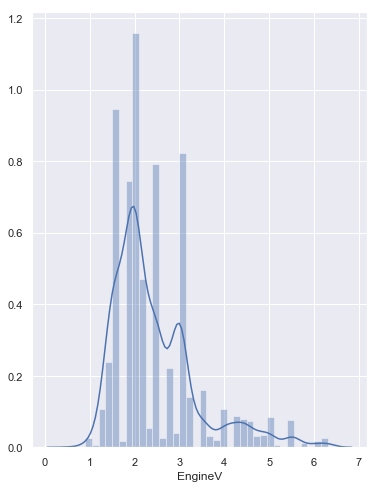

In [190]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

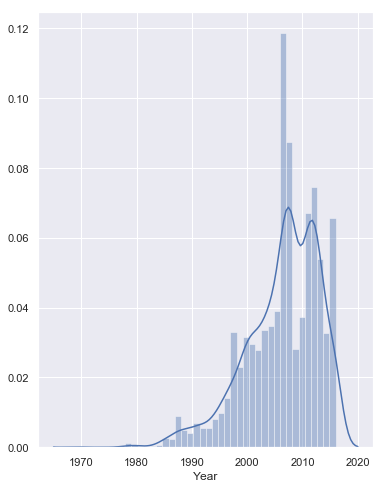

In [191]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [192]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

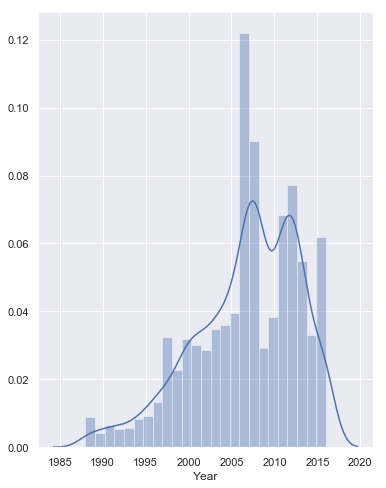

In [193]:
# Here's the new result
sns.distplot(data_4['Year'])

In [194]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [195]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71,NaN
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00,NaN


In [196]:
data_cleaned.corr()

,Price,Mileage,EngineV,Year
Price,1.00,-0.55,0.39,0.57
Mileage,-0.55,1.00,0.01,-0.72
EngineV,0.39,0.01,1.00,-0.02
Year,0.57,-0.72,-0.02,1.00


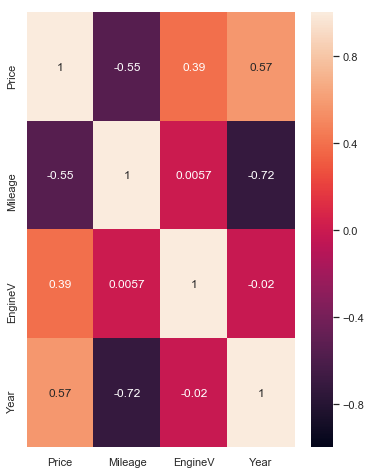

In [197]:
sns.heatmap(data_cleaned.corr(), vmin=-1, vmax=1, annot=True)

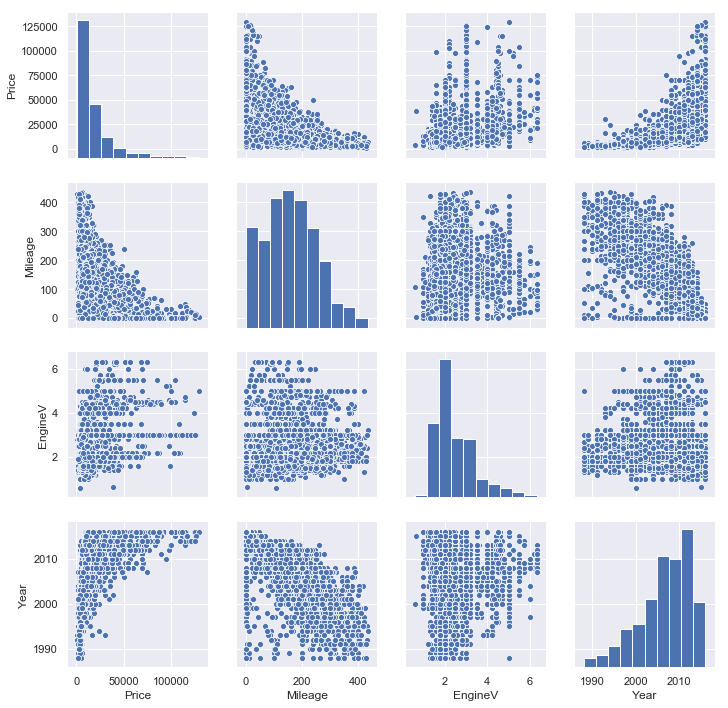

In [198]:
sns.pairplot(data_cleaned)

## Checking the OLS assumptions

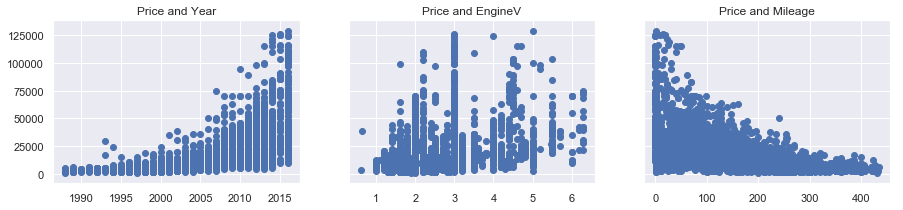

In [199]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

### Relaxing the assumptions

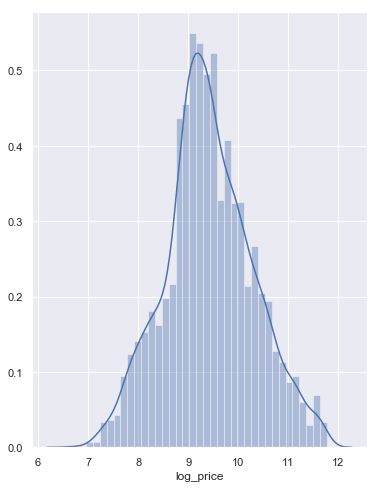

In [200]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

sns.distplot(data_cleaned['log_price'])

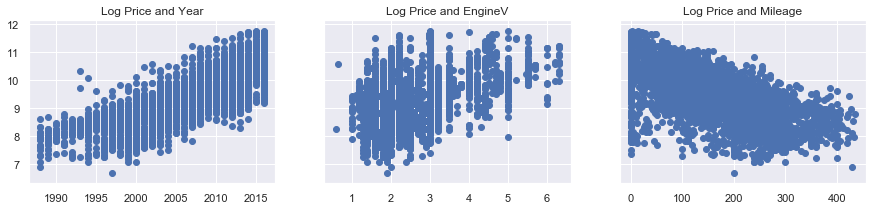

In [201]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [202]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

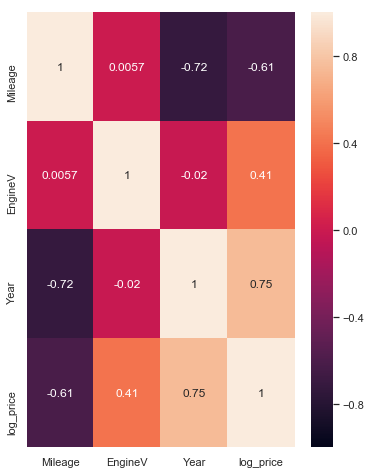

In [203]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values
sns.heatmap(data_cleaned.corr(), vmin=-1, vmax=1, annot=True)

In [204]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
# Finally, I like to include names so it is easier to explore the result


In [205]:
# Let's explore the result
vif

,VIF,Features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [206]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.00,Petrol,yes,320,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,Sprinter 212,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,S 500,9.50
3,Audi,crossover,240,4.20,Petrol,yes,Q7,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,Rav 4,9.81


## Create dummy variables

In [213]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity.drop(['Model'], axis=1), drop_first=True)

In [214]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [230]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif

input = data_with_dummies.drop(['log_price'],axis=1)
target = data_with_dummies['log_price']

f_values, p_values = f_classif(input, target)
reg_summary = pd.DataFrame(data = input.columns.values, columns=['Features'])
reg_summary ['f-test'] = f_values.round(3)
reg_summary ['p-values'] = p_values.round(3)
reg_summary


,Features,f-test,p-values
0,Mileage,3.94,0.00
1,EngineV,2.74,0.00
2,Brand_BMW,1.53,0.00
3,Brand_Mercedes-Benz,1.37,0.00
4,Brand_Mitsubishi,0.78,1.00
5,Brand_Renault,1.36,0.00
6,Brand_Toyota,1.58,0.00
7,Brand_Volkswagen,1.11,0.03
8,Body_hatch,0.97,0.73
9,Body_other,1.17,0.00


In [232]:
# Create and fit selector
selector = SelectKBest(f_classif)
selector.fit(input, target)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
input_df_new = input.iloc[:,cols]

print('Original number of features:', input.shape)
print(input.columns.values)
print('\nReduced number of features:', input_df_new.shape)
print(input_df_new.columns.values)



Original number of features: (3867, 17)
['Mileage' 'EngineV' 'Brand_BMW' 'Brand_Mercedes-Benz' 'Brand_Mitsubishi'
 'Brand_Renault' 'Brand_Toyota' 'Brand_Volkswagen' 'Body_hatch'
 'Body_other' 'Body_sedan' 'Body_vagon' 'Body_van' 'Engine Type_Gas'
 'Engine Type_Other' 'Engine Type_Petrol' 'Registration_yes']

Reduced number of features: (3867, 10)
['Mileage' 'EngineV' 'Brand_BMW' 'Brand_Mercedes-Benz' 'Brand_Renault'
 'Brand_Toyota' 'Body_other' 'Body_van' 'Engine Type_Petrol'
 'Registration_yes']


### Rearrange a bit

In [37]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
#data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [38]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
#cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [146]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
#data_preprocessed = data_with_dummies[cols]
#data_preprocessed.head()

data_preprocessed = data_with_dummies

## Linear regression model

### Declare the inputs and the targets

In [147]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [148]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [149]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


### Train Test Split

In [150]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [151]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

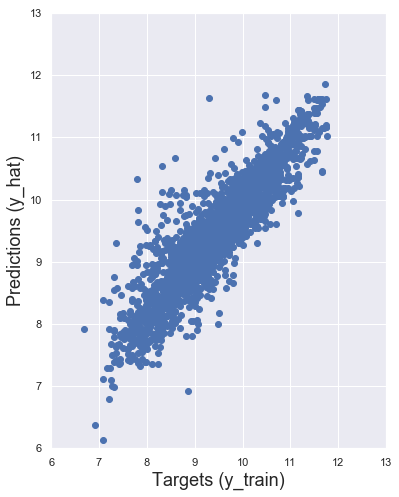

In [153]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Let's also name the axes
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same


Text(0.5, 1.0, 'Residuals PDF')

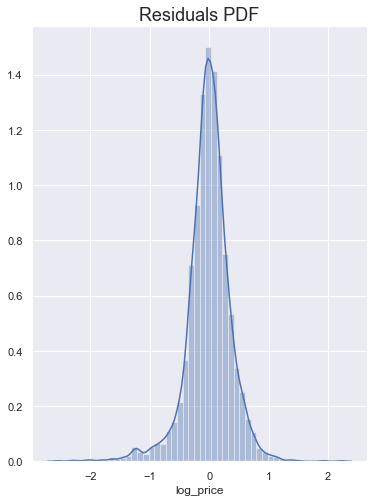

In [154]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [155]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.8152080470188288

### Finding the weights and bias

In [156]:
# Obtain the bias (intercept) of the regression
reg.intercept_

535404855537.1341

In [157]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-3.55294168e-01,  1.33145247e-02, -2.65662008e+12, -2.86257551e+12,
       -2.71110818e+12,  1.86520391e+12, -9.39154973e+12, -1.28775045e+13,
       -6.45185493e-02, -1.80478455e-02, -7.82715271e-02, -4.84913666e-02,
       -1.72302789e-02, -1.02615853e-01, -2.35974224e-02, -1.22086190e-01,
        3.15751215e-01, -4.48902940e+11,  2.33872869e+12,  2.70001639e-02,
        4.14533128e-02, -6.83463610e-03, -2.98812925e+11,  6.29605526e-03,
        1.68344017e-02, -3.61262662e-02,  7.61338136e-02,  6.46199420e-03,
       -2.11319978e+11,  1.15887440e-02, -9.15105454e-03,  1.85160820e-02,
        6.18408448e-02,  1.25732422e-01,  4.81420348e+12,  2.80761719e-02,
        3.95660400e-02,  5.49316406e-02,  5.93604337e+12,  2.63671875e-02,
        3.51562500e-02,  2.76138720e+12,  3.75976562e-02,  4.44946289e-02,
        1.71875000e-01,  5.27954102e-02,  1.17333280e+13,  7.56835938e-02,
        6.66503906e-02,  1.16699219e-01,  8.21533203e-02,  2.56347656e-02,
       -1.26924726e+13,  

In [158]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.36
1,EngineV,0.01
2,Brand_BMW,-2656620076268.64
3,Brand_Mercedes-Benz,-2862575507653.06
4,Brand_Mitsubishi,-2711108183567.48
5,Brand_Renault,1865203910306.59
6,Brand_Toyota,-9391549725312.15
7,Brand_Volkswagen,-12877504471117.45
8,Body_hatch,-0.06
9,Body_other,-0.02


In [159]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [160]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

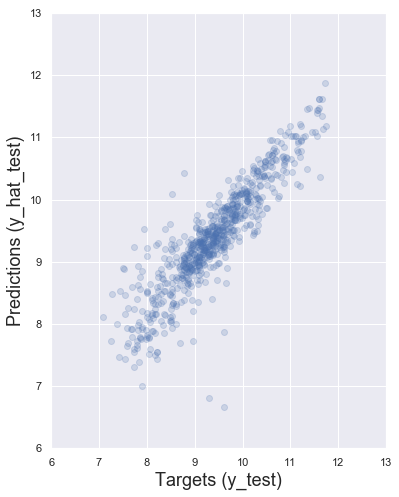

In [161]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [162]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,Prediction
0,10185.28
1,inf
2,5570.18
3,7495.50
4,11208.21


In [163]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,10185.28,NaN
1,inf,7900.00
2,5570.18,NaN
3,7495.50,NaN
4,11208.21,NaN
5,inf,14200.00
6,inf,NaN
7,13027.17,NaN
8,12750.27,11950.00
9,45071.41,NaN


In [164]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: log_price, dtype: float64

In [165]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10185.28,2300.00
1,inf,2800.00
2,5570.18,2500.00
3,7495.50,6400.00
4,11208.21,9150.00
5,inf,20000.00
6,inf,38888.00
7,13027.17,16999.00
8,12750.27,12500.00
9,45071.41,41000.00


In [166]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [167]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10185.28,2300.00,-7885.28,342.84
1,inf,2800.00,-inf,inf
2,5570.18,2500.00,-3070.18,122.81
3,7495.50,6400.00,-1095.50,17.12
4,11208.21,9150.00,-2058.21,22.49
5,inf,20000.00,-inf,inf
6,inf,38888.00,-inf,inf
7,13027.17,16999.00,3971.83,23.37
8,12750.27,12500.00,-250.27,2.00
9,45071.41,41000.00,-4071.41,9.93


In [168]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,inf,18165.82,-inf,inf
std,NaN,19967.86,NaN,NaN
min,0.00,1200.00,-inf,0.01
25%,7411.80,6900.00,-2267.02,9.28
50%,11626.28,11600.00,-30.97,20.12
75%,20532.18,20500.00,2131.41,35.45
max,inf,126000.00,80504.34,inf


In [169]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
740,6250.50,6250.00,-0.50,0.01
716,13493.30,13500.00,6.70,0.05
421,9756.90,9750.00,-6.90,0.07
493,5002.84,4999.00,-3.84,0.08
515,41037.99,41000.00,-37.99,0.09
637,40048.21,40000.00,-48.21,0.12
402,10185.28,10200.00,14.72,0.14
106,14223.96,14200.00,-23.96,0.17
519,6885.82,6900.00,14.18,0.21
758,7932.30,7950.00,17.70,0.22
